# Timeseries in Pandas
---

- get data into the dataframe
- convert to appropriate columns into time-series

[doc](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#overview)

In [43]:
import pandas as pd

## Getting Data

there are lot of useful datasets at datahub.io

in this notebook, this data will be used - https://datahub.io/core/co2-ppm/_r/-/data/co2-mm-mlo.csv

In [44]:
df = pd.read_csv('https://datahub.io/core/co2-ppm/_r/-/data/co2-mm-mlo.csv')
df.head(3)

,Date,Decimal Date,Average,Interpolated,Trend,Number of Days
1958-03,1958.2027,315.71,314.44,-1,-9.99,-0.99
1958-04,1958.2877,317.45,315.16,-1,-9.99,-0.99
1958-05,1958.3699,317.51,314.69,-1,-9.99,-0.99


In [45]:
# above view we can see that the columns are shifted one to the left, so we need to fix this
fields = ['Date', 'Interpolated']
df = pd.read_csv('https://datahub.io/core/co2-ppm/_r/-/data/co2-mm-mlo.csv', usecols=fields)
df.head(3)

,Date,Interpolated
1958-03,1958.2027,-1
1958-04,1958.2877,-1
1958-05,1958.3699,-1


In [69]:
# it didn't work, so we need to fix this again
names = ['Date', 'DateDecimal', 'Average', 'Interpolated', 'Trend', 'NumberOfDays', 'Extra']
df = pd.read_csv('https://datahub.io/core/co2-ppm/_r/-/data/co2-mm-mlo.csv', header = None, names = names, skiprows = 1)
df.head(3)

,Date,DateDecimal,Average,Interpolated,Trend,NumberOfDays,Extra
0,1958-03,1958.2027,315.71,314.44,-1,-9.99,-0.99
1,1958-04,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958-05,1958.3699,317.51,314.69,-1,-9.99,-0.99


In [70]:
df['Date']

0      1958-03
1      1958-04
2      1958-05
3      1958-06
4      1958-07
        ...   
795    2024-06
796    2024-07
797    2024-08
798    2024-09
799    2024-10
Name: Date, Length: 800, dtype: object

we will use [to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) for `'Date'`

In [71]:
pd.to_datetime(df['Date'])

0     1958-03-01
1     1958-04-01
2     1958-05-01
3     1958-06-01
4     1958-07-01
         ...    
795   2024-06-01
796   2024-07-01
797   2024-08-01
798   2024-09-01
799   2024-10-01
Name: Date, Length: 800, dtype: datetime64[ns]

In [72]:
df['Date'] = pd.to_datetime(df['Date'])

In [73]:
df['Date']

0     1958-03-01
1     1958-04-01
2     1958-05-01
3     1958-06-01
4     1958-07-01
         ...    
795   2024-06-01
796   2024-07-01
797   2024-08-01
798   2024-09-01
799   2024-10-01
Name: Date, Length: 800, dtype: datetime64[ns]

# Seaborn

is a nice plotting package based on `matplotlib`

In [74]:
import seaborn as sns

<Axes: xlabel='Date', ylabel='Average'>

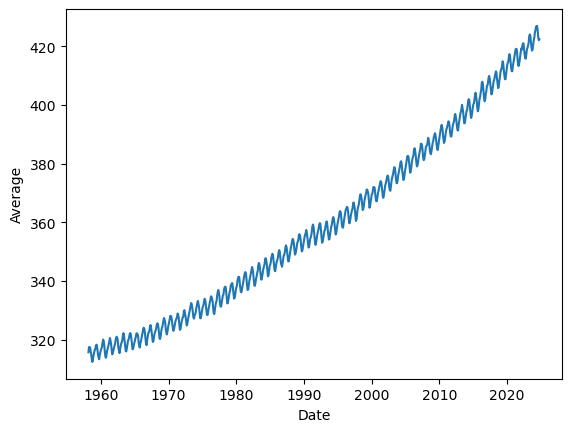

In [75]:
sns.lineplot(data = df, x = 'Date', y = 'Average')

<Axes: xlabel='Date', ylabel='Average'>

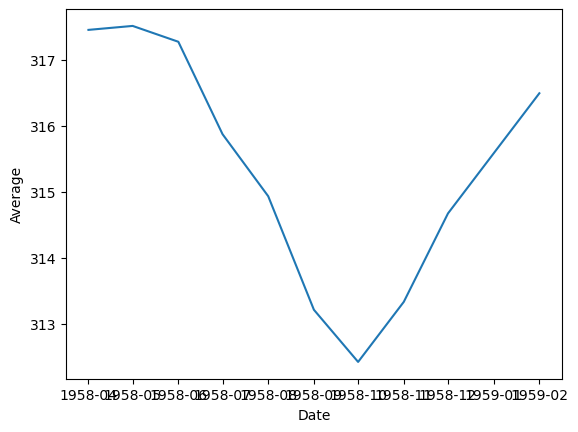

In [76]:
sns.lineplot(data = df.iloc[1:12], x = 'Date', y = 'Average')

<Axes: xlabel='Date', ylabel='Average'>

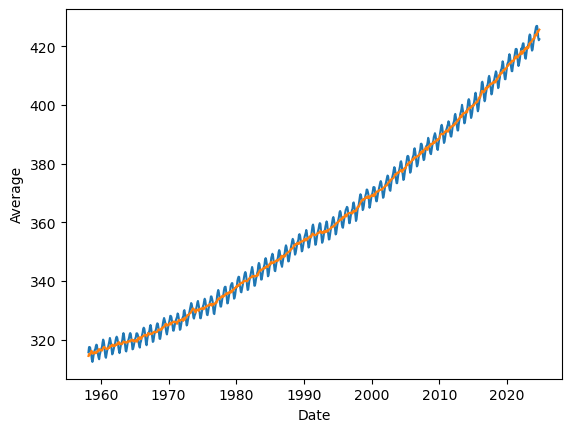

In [77]:
sns.lineplot(data = df, x = 'Date', y = 'Average')
sns.lineplot(data = df, x = 'Date', y = 'Interpolated')

## Irish Data

Have a look at [data.gov.ie](https://data.gov.ie/)

we will be using - https://cli.fusio.net/cli/climate_data/webdata/mly4935.csv

In [78]:
df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/mly4935.csv')
df.head(3)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 2


In [79]:
# we have to skip certain rows due to the information were given in the first 19 rows
df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/mly4935.csv', skiprows = 19)
df.head(3)

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
0,1996,8,13.4,20.4,7.3,16.6,10.3,109.4,5.3,8.3,34,
1,1996,10,9.7,,,12.5,7.0,,,,,
2,1996,11,5.0,,,7.6,2.5,,,,,


In [80]:
# year and the month are in the different columns, so we need to combine them
pd.to_datetime(df[['year', 'month']])

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day] is missing

In [81]:
# we need a 'day' column to combine the year and the month
df['day'] = 1
df.head(3)

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,day
0,1996,8,13.4,20.4,7.3,16.6,10.3,109.4,5.3,8.3,34,,1
1,1996,10,9.7,,,12.5,7.0,,,,,,1
2,1996,11,5.0,,,7.6,2.5,,,,,,1


In [114]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df['date']

date
1996-08-01   1996-08-01
1996-10-01   1996-10-01
1996-11-01   1996-11-01
1996-12-01   1996-12-01
1997-01-01   1997-01-01
                ...    
2024-07-01   2024-07-01
2024-08-01   2024-08-01
2024-09-01   2024-09-01
2024-10-01   2024-10-01
2024-11-01   2024-11-01
Name: date, Length: 339, dtype: datetime64[ns]

<Axes: xlabel='date', ylabel='meant'>

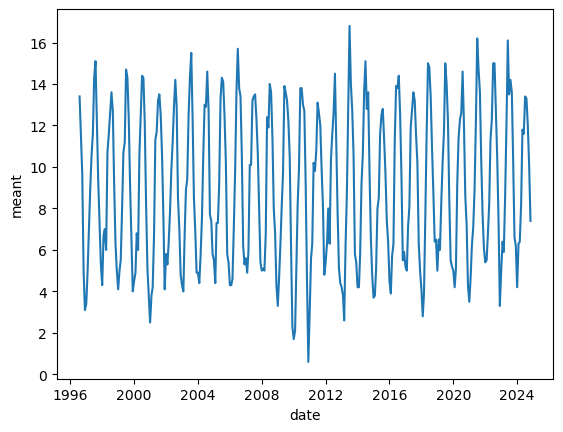

In [83]:
sns.lineplot(data = df, x = 'date', y = 'meant')

## Setting the index to the datetime

if you woukd like to do some analysis on the date based on time, you should set the index of the DataFrame to be the date

In [85]:
df.set_index('date', inplace = True)
df.head(3)

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,day
date,,,,,,,,,,,,,
1996-08-01,1996,8,13.4,20.4,7.3,16.6,10.3,109.4,5.3,8.3,34,,1
1996-10-01,1996,10,9.7,,,12.5,7.0,,,,,,1
1996-11-01,1996,11,5.0,,,7.6,2.5,,,,,,1


<Axes: xlabel='date', ylabel='meant'>

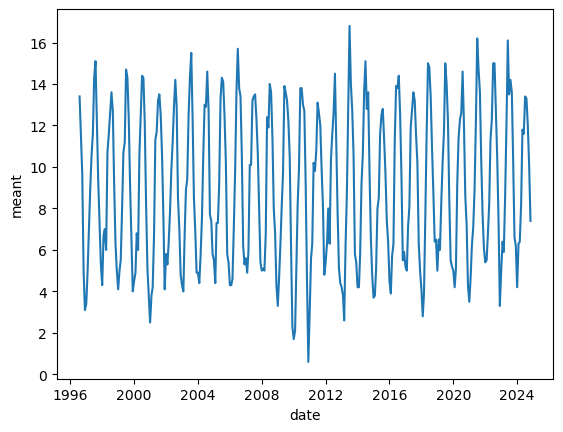

In [86]:
sns.lineplot(data = df, x = 'date', y = 'meant')

<Axes: xlabel='date', ylabel='meant'>

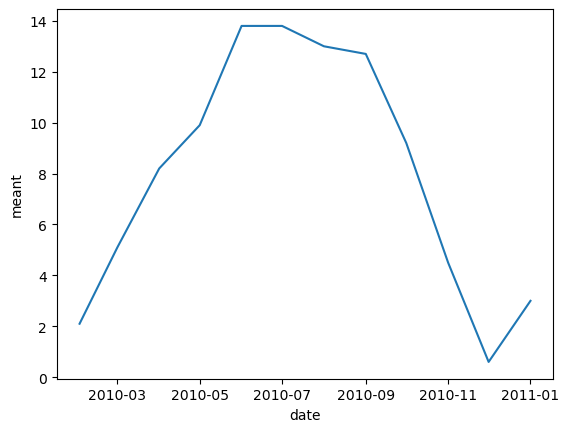

In [87]:
# let's look at one year of data
# 'loc' is used to access a group of rows and columns by label(s) or a boolean array
date_from = "2010-01-01 01:00:00"
date_to = "2011-01-01 01:00:00"

sns.lineplot(data = df.loc[date_from:date_to], x = 'date', y = 'meant')

<Axes: xlabel='date', ylabel='meant'>

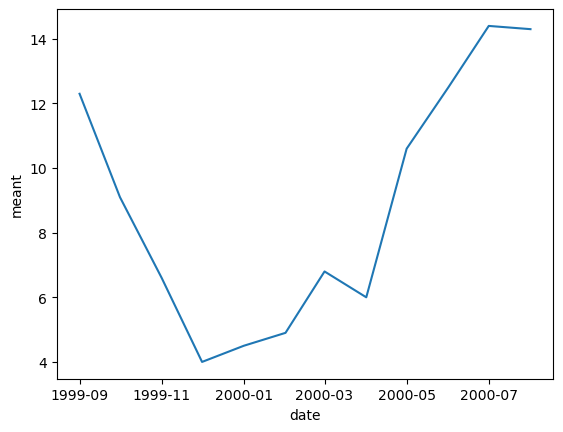

In [88]:
# remember 'iloc' is used to access a group of rows and columns by integer position(s)
sns.lineplot(data = df.iloc[36:48], x = 'date', y = 'meant')

### Get the mean temprature

select the row and column

note!: be careful taking the mean of a mean or percentage, this can cause unsound data

In [89]:
date_from = "2010-01-01 01:00:00"
date_to = "2011-01-01 01:00:00"
df.loc[date_from:date_to]['meant'].mean()

7.991666666666666

### Resample

you can resample the date by breaking it up into chinks. ie: plot to avarage temprature each year

[Resampling - doc](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling)

In [90]:
df['meant'].resample('1YE').mean()

date
1996-12-31    7.800000
1997-12-31    9.150000
1998-12-31    8.808333
1999-12-31    8.791667
2000-12-31    8.600000
2001-12-31    8.475000
2002-12-31    8.875000
2003-12-31    9.008333
2004-12-31    8.925000
2005-12-31    9.100000
2006-12-31    9.066667
2007-12-31    9.433333
2008-12-31    8.691667
2009-12-31    8.650000
2010-12-31    7.883333
2011-12-31    8.850000
2012-12-31    8.616667
2013-12-31    8.625000
2014-12-31    9.200000
2015-12-31    8.400000
2016-12-31    8.941667
2017-12-31    9.158333
2018-12-31    8.833333
2019-12-31    9.000000
2020-12-31    8.883333
2021-12-31    9.266667
2022-12-31    9.441667
2023-12-31    9.875000
2024-12-31    9.518182
Freq: YE-DEC, Name: meant, dtype: float64

`rolling()` can be used as well, it provides rolling calculations eg 'avarages'

### Aggregation 

`agg()` 

instead of just doing the `mean()`, you can do multiple operations (even use our own `lambda` functions)

[Aggregation doc](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#aggregation)

In [107]:
df.head(3)

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,day
date,,,,,,,,,,,,,
1996-08-01,1996,8,13.4,20.4,7.3,16.6,10.3,109.4,5.3,8.3,34,,1
1996-10-01,1996,10,9.7,,,12.5,7.0,,,,,,1
1996-11-01,1996,11,5.0,,,7.6,2.5,,,,,,1


In [108]:
print(df.dtypes)

year       int64
month      int64
meant    float64
maxtp     object
mintp     object
mnmax    float64
mnmin    float64
rain      object
gmin      object
wdsp      object
maxgt     object
sun       object
day        int64
dtype: object


In [109]:
df['maxtp'] = pd.to_numeric(df['maxtp'], errors = 'coerce')
df['mintp'] = pd.to_numeric(df['mintp'], errors = 'coerce')
df['rain'] = pd.to_numeric(df['rain'], errors = 'coerce')
df['gmin'] = pd.to_numeric(df['gmin'], errors = 'coerce')
df['wdsp'] = pd.to_numeric(df['wdsp'], errors = 'coerce')
df['maxgt'] = pd.to_numeric(df['maxgt'], errors = 'coerce')
df['sun'] = pd.to_numeric(df['sun'], errors = 'coerce')


In [111]:
rs = df.resample("1YE") # resample the entire dataset by year

In [112]:
rs.mean()

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,day
date,,,,,,,,,,,,,
1996-12-31,1996.0,10.25,7.800000,15.550000,1.650000,10.475000,5.225000,109.400000,0.000000,8.850000,41.000000,NaN,1.0
1997-12-31,1997.0,6.50,9.150000,16.666667,1.691667,12.166667,6.141667,105.183333,-0.808333,9.700000,47.000000,99.816667,1.0
1998-12-31,1998.0,6.50,8.808333,16.491667,1.600000,11.700000,5.883333,118.550000,-1.233333,10.083333,51.300000,90.850000,1.0
1999-12-31,1999.0,6.50,8.791667,16.141667,1.716667,11.791667,5.783333,137.933333,-0.991667,10.200000,48.454545,95.900000,1.0
2000-12-31,2000.0,6.50,8.600000,16.833333,1.300000,11.700000,5.508333,114.258333,-1.225000,9.900000,45.083333,109.033333,1.0
2001-12-31,2001.0,6.50,8.475000,15.558333,1.416667,11.458333,5.483333,89.791667,-2.425000,9.200000,46.416667,107.175000,1.0
2002-12-31,2002.0,6.50,8.875000,16.450000,1.858333,11.858333,5.875000,121.983333,-1.583333,10.025000,48.666667,99.650000,1.0
2003-12-31,2003.0,6.50,9.008333,17.883333,1.800000,12.200000,5.825000,90.741667,-0.891667,9.533333,42.166667,115.150000,1.0
2004-12-31,2004.0,6.50,8.925000,16.250000,1.608333,11.858333,5.966667,114.525000,-2.008333,9.750000,46.166667,110.808333,1.0


In [113]:
rs['meant'].agg(['mean', 'std'])

,mean,std
date,,
1996-12-31,7.800000,4.651165
1997-12-31,9.150000,3.719360
1998-12-31,8.808333,3.312911
1999-12-31,8.791667,3.846003
2000-12-31,8.600000,3.971947
2001-12-31,8.475000,4.107228
2002-12-31,8.875000,3.265557
2003-12-31,9.008333,3.907675
2004-12-31,8.925000,3.618670
